In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\clustering\\EastWestAirlines.xlsx")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
with pd.option_context("display.max_columns", None):
    display(data)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
data.shape

(3999, 12)

In [9]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


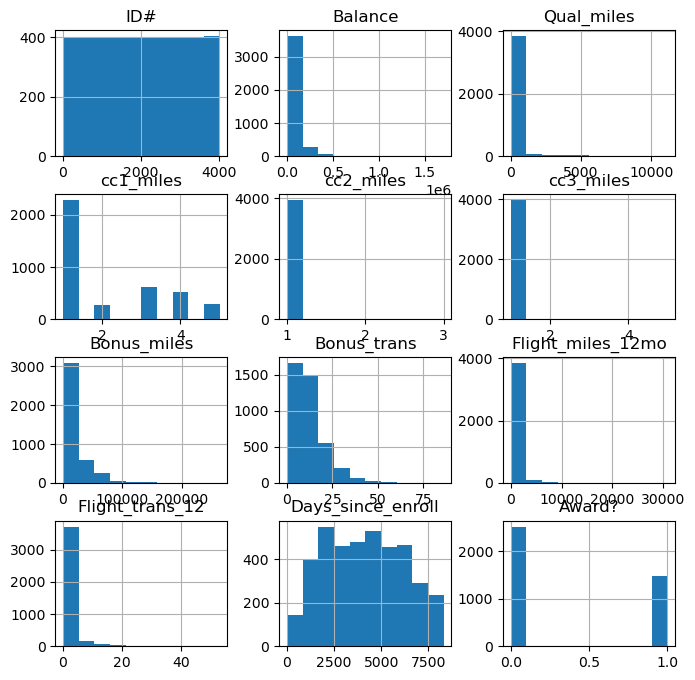

In [10]:
data.hist(figsize=(8,8));

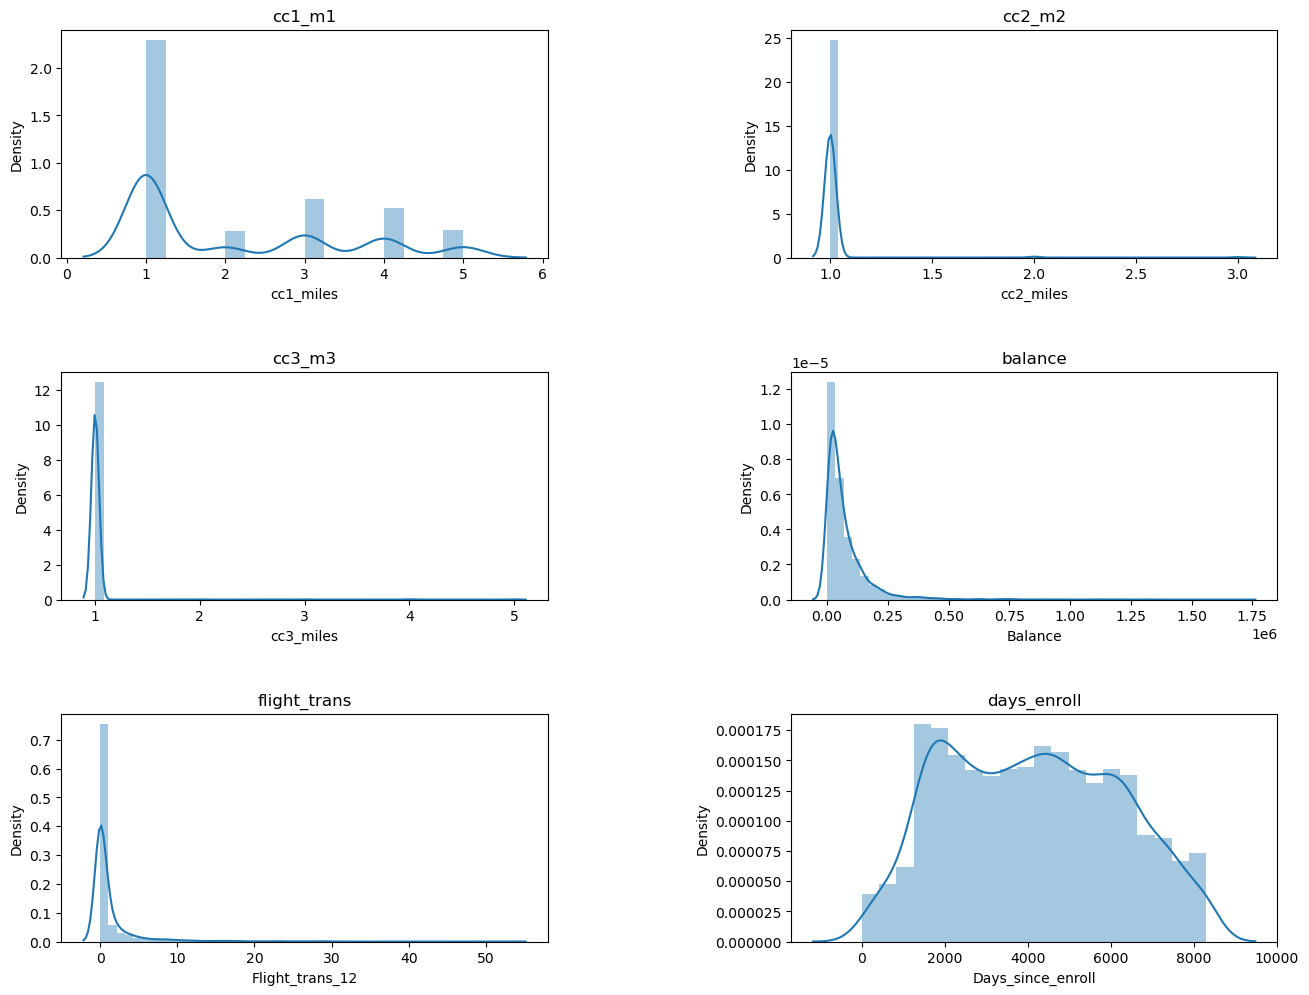

In [11]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,2,1)
sns.distplot(data['cc1_miles'])
plt.title('cc1_m1')
plt.subplot(3,2,2)
sns.distplot(data['cc2_miles'])
plt.title('cc2_m2')
plt.subplot(3,2,3)
sns.distplot(data['cc3_miles'])
plt.title('cc3_m3')
plt.subplot(3,2,4)
sns.distplot(data['Balance'])
plt.title('balance')
plt.subplot(3,2,5)
sns.distplot(data['Flight_trans_12'])
plt.title('flight_trans')
plt.subplot(3,2,6)
sns.distplot(data['Days_since_enroll'])
plt.title('days_enroll')
plt.show()

In [12]:
  # all the features are positively skewed

<AxesSubplot:>

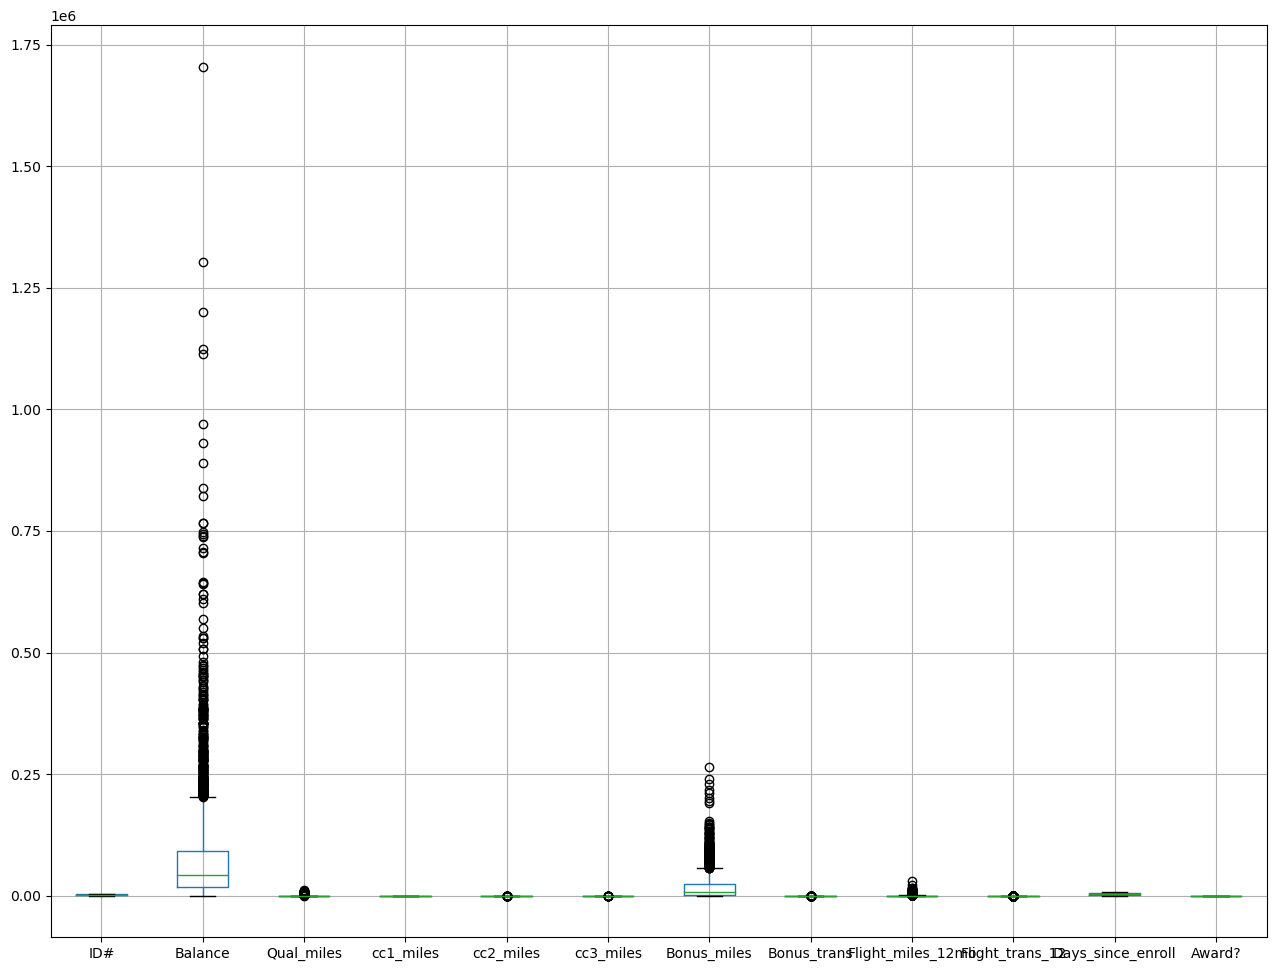

In [13]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
data.boxplot()



In [14]:
#features except id,cc1_miles,days_since_enroll,award have outliers

In [15]:
# correlation analysis

In [16]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


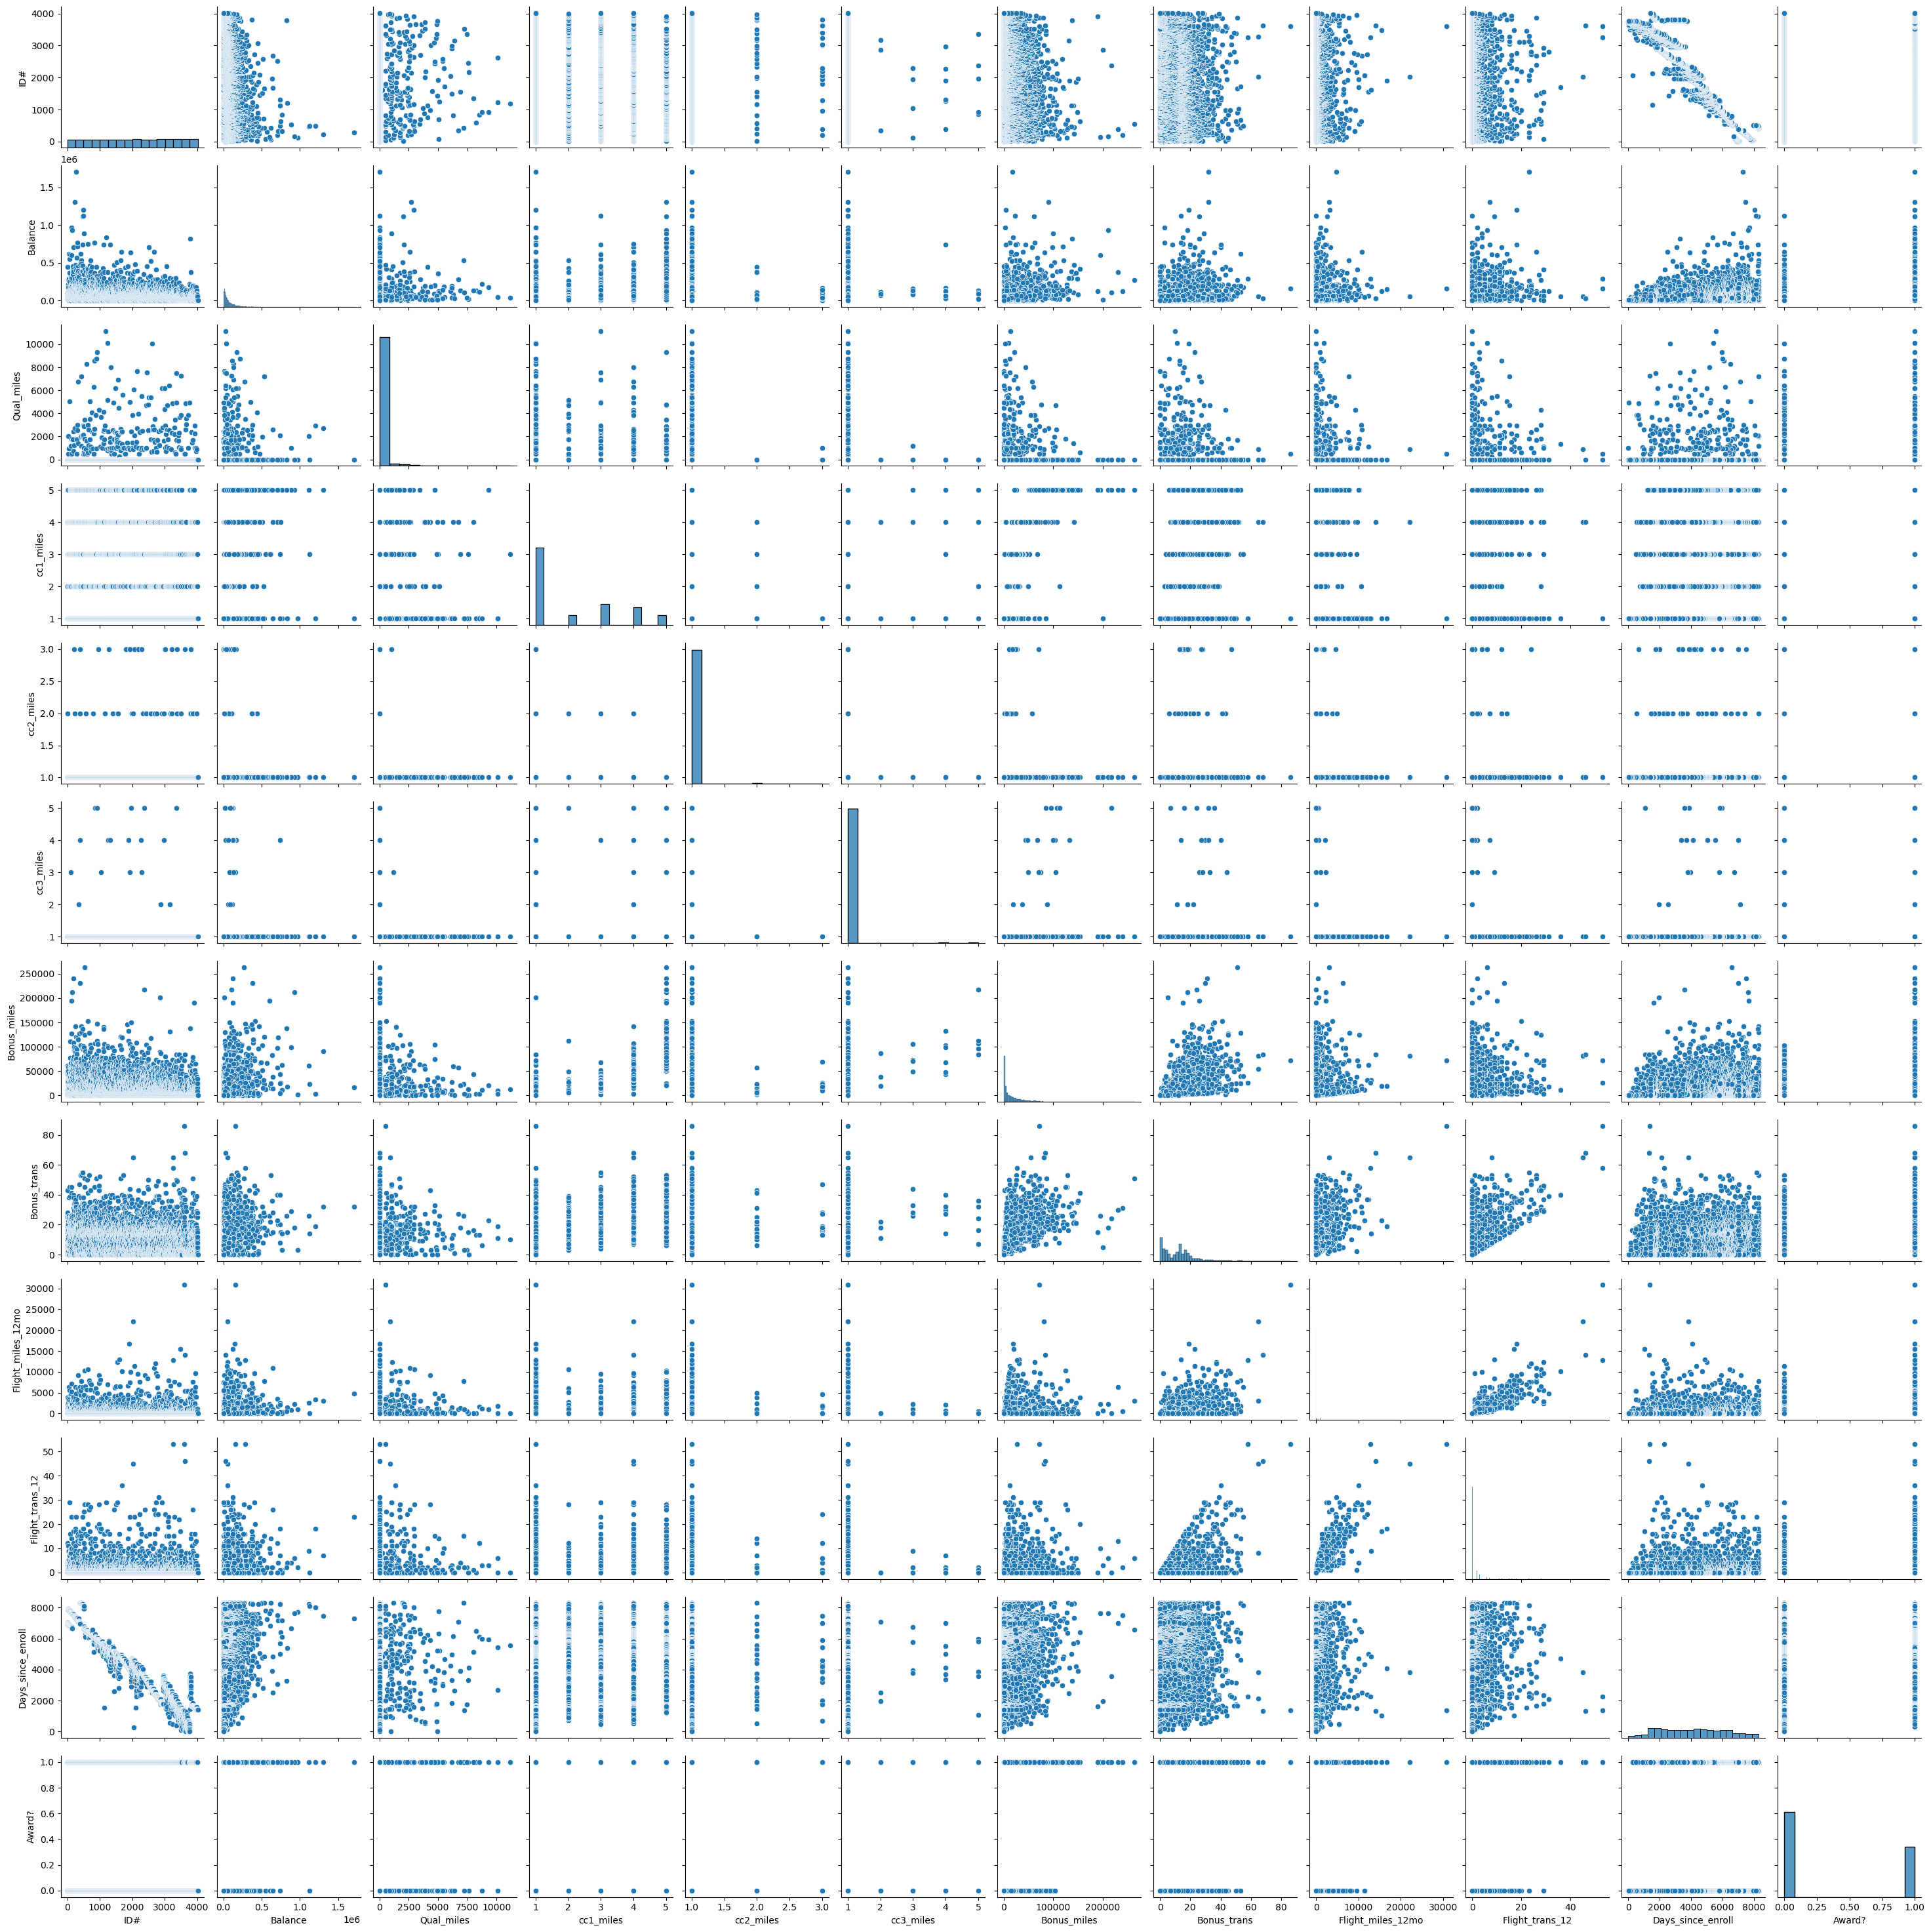

In [17]:
sns.pairplot(data)

In [18]:
#normalization

In [19]:
def norm_dist(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
data1=norm_dist(data.iloc[:,1:])
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierachical clusturing

In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

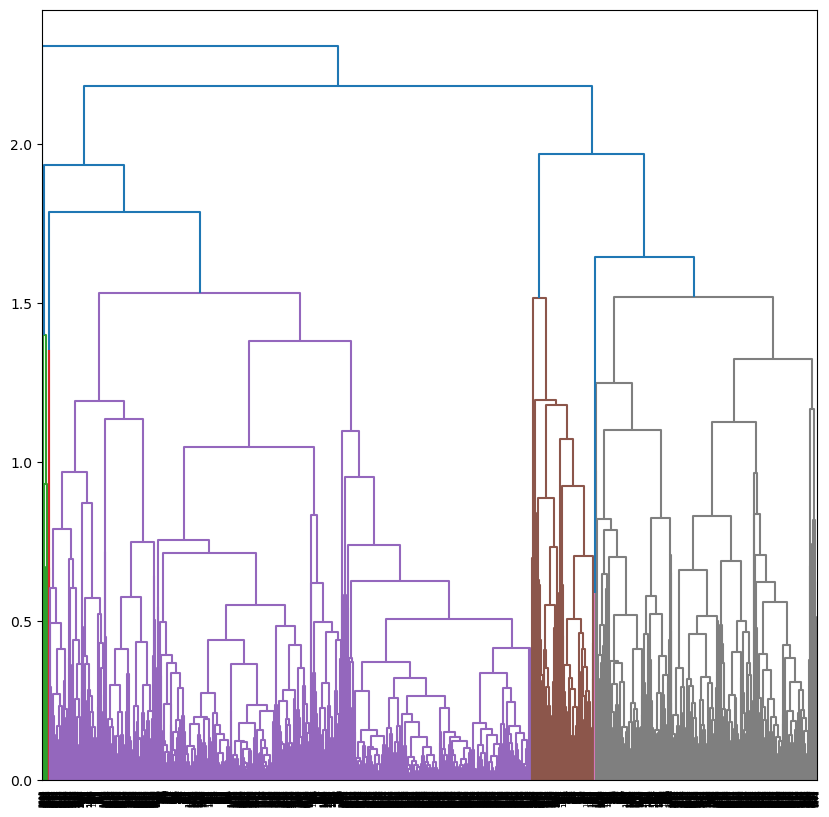

In [22]:
plt.figure(figsize=(10,10))
dendogram=sch.dendrogram(sch.linkage(data1,method='complete'))
plt.show()

In [23]:
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [24]:
clusters=hc.fit_predict(data1)
clusters

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [25]:
data1['Clusters']=clusters

In [26]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [27]:
#We can observe that there are 3 clusters [0,1,2]

In [28]:
data1[data1['Clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,0.022959,0.0,0.5,0.0,0.0,0.056814,0.325581,0.000000,0.000000,0.169520,0.0,0
3992,0.006558,0.0,0.0,0.0,0.0,0.003523,0.139535,0.000000,0.000000,0.169400,0.0,0
3993,0.002331,0.0,0.0,0.0,0.0,0.001384,0.034884,0.000000,0.000000,0.168194,0.0,0
3997,0.032202,0.0,0.0,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [29]:
data1[data1['Clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,0.057338,0.00000,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
11,0.056617,0.00000,1.00,0.0,0.0,0.231735,0.220930,0.000000,0.000000,0.834579,1.0,1
15,0.016714,0.00000,0.75,0.0,0.0,0.187504,0.174419,0.000000,0.000000,0.833132,1.0,1
16,0.030437,0.00000,0.75,0.0,0.0,0.185687,0.186047,0.000000,0.000000,0.832891,1.0,1
20,0.070726,0.00000,1.00,0.0,0.0,0.223111,0.267442,0.008112,0.037736,0.831203,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3753,0.041164,0.00000,1.00,0.0,0.0,0.233347,0.139535,0.042185,0.113208,0.398360,1.0,1
3772,0.482346,0.00000,1.00,0.0,0.0,0.524618,0.302326,0.019470,0.037736,0.396190,1.0,1
3846,0.057196,0.15052,1.00,0.0,0.0,0.271570,0.593023,0.248240,0.490566,0.200506,1.0,1
3855,0.111876,0.00000,1.00,0.0,0.0,0.299281,0.325581,0.079502,0.169811,0.198457,1.0,1


In [30]:
data1[data1['Clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
7,0.012233,0.0,0.0,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,2
8,0.259850,0.0,0.5,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,2
9,0.061507,0.0,0.5,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,2
17,0.008187,0.0,0.0,0.0,0.0,0.016273,0.058140,0.000000,0.000000,0.832288,1.0,2
18,0.053655,0.0,0.5,0.0,0.0,0.103942,0.197674,0.000000,0.000000,0.832047,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,0.006999,0.0,0.0,0.0,0.0,0.000944,0.034884,0.002564,0.018868,0.170002,1.0,2
3989,0.001538,0.0,0.0,0.0,0.0,0.006163,0.069767,0.000000,0.000000,0.169038,1.0,2
3994,0.010837,0.0,0.0,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.0,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2


In [120]:
data1[data1['Clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
3583,0.093917,0.044851,0.00,0.0,0.0,0.272879,1.000000,1.000000,1.000000,0.165300,1.0,3
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3


In [119]:
data1['Clusters'].value_counts()

0    2526
2    1144
1     325
3       4
Name: Clusters, dtype: int64

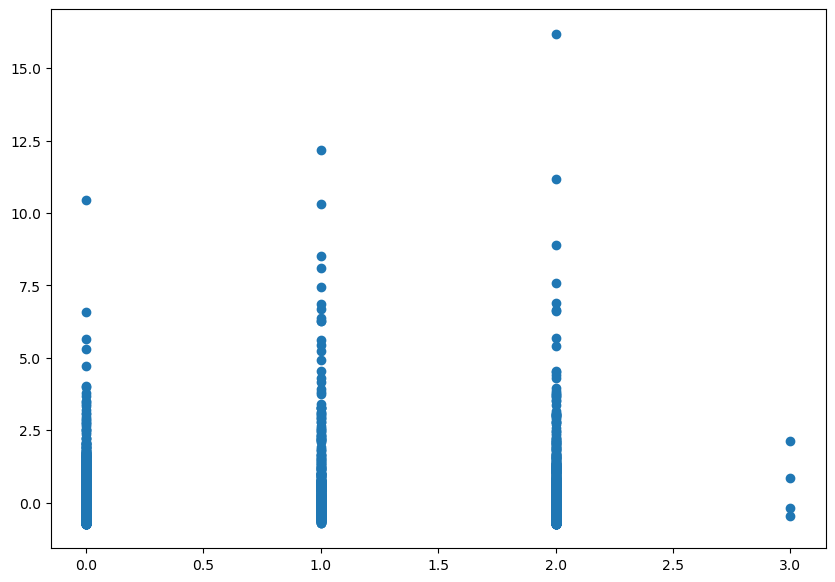

In [123]:
plt.figure(figsize=(10,7))
plt.scatter(data1['Clusters'],data2['Balance'])

# kmean clustering


In [32]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [33]:
from sklearn.cluster import KMeans

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])
print(scaled_data)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


[43989.000000000015, 35409.51145242437, 30899.246824652197, 27446.37245668138, 24541.32958204578, 21089.973628929645, 19165.861458655665, 17316.866446128297, 16043.406242309518, 14726.983322766795]


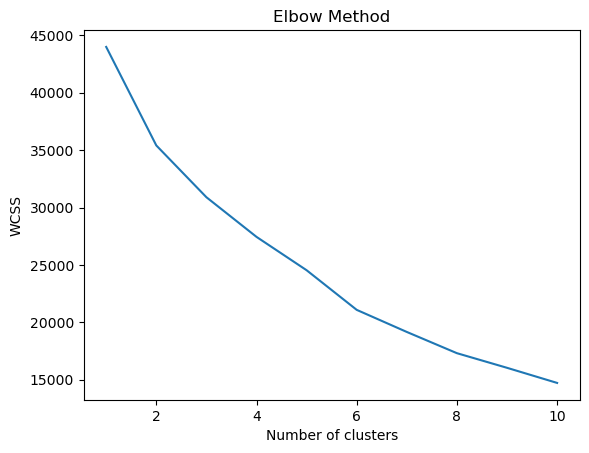

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# From above plot,it is seen elbow from 2 no of clusters so we can take no of clusters as 2 for model building

In [37]:
kc=KMeans(n_clusters=2,random_state=0)

In [38]:
clusters=kc.fit(scaled_data)

In [39]:
clusters.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
data2=pd.DataFrame(scaled_data,columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'])

In [41]:
data2['km_Clusters']=clusters.labels_

In [42]:
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,km_Clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1


In [43]:
#inferences

In [44]:
data2.groupby('km_Clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
km_Clusters,,,,,,,,,,,
0,0.587254,0.147474,1.127312,-0.030506,0.126373,1.006991,0.914778,0.363324,0.404285,0.398513,0.703375
1,-0.282857,-0.071032,-0.542981,0.014693,-0.060869,-0.485027,-0.440612,-0.174999,-0.194728,-0.191948,-0.338788


In [118]:
data2['km_Clusters'].value_counts()

1    2699
0    1300
Name: km_Clusters, dtype: int64

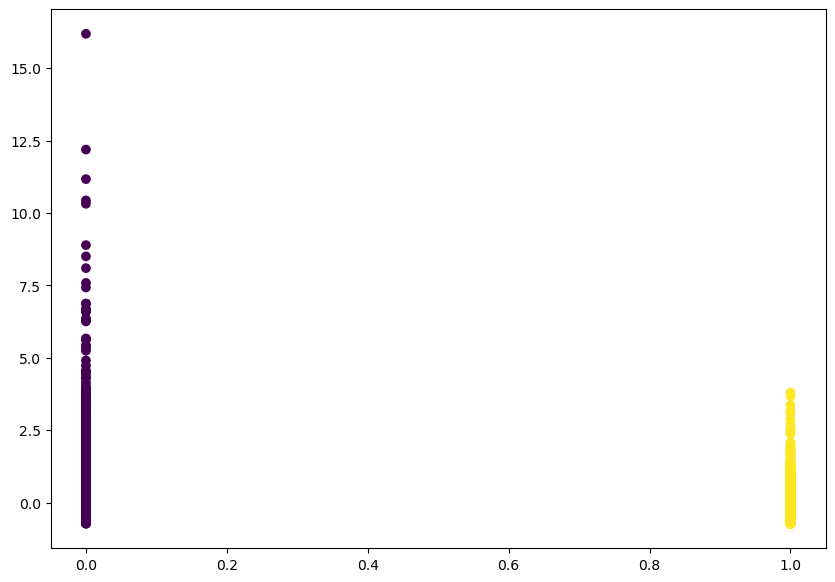

In [116]:
plt.figure(figsize=(10,7))
plt.scatter(data2['km_Clusters'],data2['Balance'],c=clusters.labels_)

# Inference:
# With Hierarchical clustering we got [0,1,2] i.e., 3 clusters

# With KMeans Clustering we got [0,1] i.e., 2 clusters

#  DBSCAN Clustering

In [45]:
from sklearn.cluster import DBSCAN

In [52]:
data3=data.iloc[:,1:]
data3.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [48]:
scaler1=StandardScaler()
data_S3=scaler1.fit_transform(data3)
data_S3

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [103]:
db=DBSCAN(eps=1.2,min_samples=8)
db.fit(data_S3)

DBSCAN(eps=1.2, min_samples=8)

In [104]:
db.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [105]:
data_3=pd.DataFrame(data_S3,columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'])

In [106]:
data_3['Clusters']=db.labels_

In [107]:
data_3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [108]:
data_3[data_3['Clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
5,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,-0.341984,-0.186299,0.683121,-0.098242,-0.062767,-0.089608,1.707671,-0.328603,-0.362168,-1.312698,-0.766919,0
3992,-0.619476,-0.186299,-0.769578,-0.098242,-0.062767,-0.671521,0.041457,-0.328603,-0.362168,-1.313182,-0.766919,0
3993,-0.691000,-0.186299,-0.769578,-0.098242,-0.062767,-0.694877,-0.895788,-0.328603,-0.362168,-1.318025,-0.766919,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [109]:
data_3[data_3['Clusters']==0].shape

(2348, 12)

In [110]:
data_3[data_3['Clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1
7,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1.303918,1
9,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1.303918,1
11,0.227471,-0.186299,2.135821,-0.098242,-0.062767,1.820451,0.770426,-0.328603,-0.362168,1.358648,1.303918,1
15,-0.447647,-0.186299,1.409471,-0.098242,-0.062767,1.337470,0.353873,-0.328603,-0.362168,1.352837,1.303918,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,-0.612013,-0.186299,-0.769578,-0.098242,-0.062767,-0.699680,-0.895788,-0.272176,-0.098503,-1.310761,1.303918,1
3989,-0.704418,-0.186299,-0.769578,-0.098242,-0.062767,-0.642698,-0.583373,-0.328603,-0.362168,-1.314635,1.303918,1
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1


In [111]:
data_3[data_3['Clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters


In [112]:
data_3['Clusters'].value_counts()

 0    2348
 1    1130
-1     496
 2      14
 3      11
Name: Clusters, dtype: int64

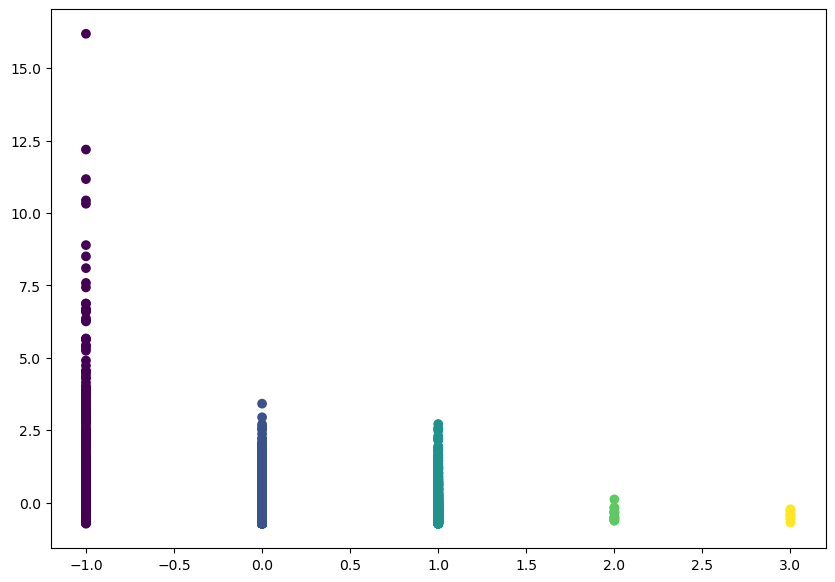

In [113]:
plt.figure(figsize=(10,7))
plt.scatter(data_3['Clusters'],data_3['Balance'],c=db.labels_)

In [115]:
data_3[data_3['Clusters']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
8,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918,-1
21,1.112309,2.430152,-0.769578,-0.098242,-0.062767,-0.159220,0.458011,0.957080,2.010813,1.345088,1.303918,-1
22,-0.526158,-0.186299,-0.769578,-0.098242,-0.062767,-0.567123,-0.062681,2.135622,2.538142,1.339277,-0.766919,-1
24,1.310497,0.460058,-0.769578,-0.098242,-0.062767,-0.543311,0.978703,0.171385,0.692490,1.846813,-0.766919,-1
42,-0.131877,-0.186299,-0.769578,-0.098242,-0.062767,-0.295878,1.499394,1.992769,2.010813,1.796931,1.303918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,-0.601384,1.106414,-0.769578,-0.098242,-0.062767,-0.134788,2.853193,-0.328603,-0.362168,-1.233275,1.303918,-1
3911,-0.175454,2.752037,-0.769578,-0.098242,-0.062767,-0.374394,0.770426,2.602754,3.856465,-1.242960,-0.766919,-1
3917,0.567139,-0.186299,1.409471,-0.098242,-0.062767,2.002868,2.644916,4.206286,1.483484,-1.246350,-0.766919,-1
3934,0.029710,-0.186299,-0.769578,-0.098242,-0.062767,-0.271984,-0.999926,6.511944,-0.098503,-1.260879,-0.766919,-1


In [ ]:
#We can see 496 observations/ datapoints fall into cluster-1 which are outliers

### With DBSCAN Clustering we got [0,1,-1] i.e., 3 clusters